In [85]:
# install dependencies for prophet
!pip install prophet


In [86]:
#import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

In [87]:
# import the 911 event data
tri_state_911_df = pd.read_csv('resources/birthdata/ny_nj_ct_911_birth_data.csv', index_col='Date', parse_dates=True)
other_states_911_df = pd.read_csv('resources/birthdata/other_states_911_birth_data.csv', index_col='Date', parse_dates=True)
la_katrina_df = pd.read_csv('resources/birthdata/la_katrina_birth_data.csv', index_col='Date', parse_dates=True)
other_states_katrina_df = pd.read_csv('resources/birthdata/other_states_katrina_birth_data.csv', index_col='Date', parse_dates=True)

# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    936 non-null    int64 
 1   Births  936 non-null    int64 
 2   State   936 non-null    object
dtypes: int64(2), object(1)
memory usage: 29.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14352 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    14352 non-null  int64 
 1   Births  14352 non-null  int64 
 2   State   14352 non-null  object
dtypes: int64(2), object(1)
memory usage: 448.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    312 non-null    int64 
 1   Births  312 non-null    int64 
 2   State   312 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    14976 non-null  int64 
 1   Births  14976 non-null  int64 
 2   State   14976 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.0+ KB


None

In [88]:
# drop Year  and State column
tri_state_911_df.drop(columns=['Year','State'], inplace=True)
other_states_911_df.drop(columns=['Year','State'], inplace=True)
la_katrina_df.drop(columns=['Year','State'], inplace=True)
other_states_katrina_df.drop(columns=['Year','State'], inplace=True)

# rename the columns
tri_state_911_df.columns = ['NY_NJ_CT_911_Births']
other_states_911_df.columns = ['Other_States_911_Births']   
la_katrina_df.columns = ['LA_Katrina_Births']
other_states_katrina_df.columns = ['Other_States_Katrina_Births']


# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NY_NJ_CT_911_Births  936 non-null    int64
dtypes: int64(1)
memory usage: 14.6 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14352 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Other_States_911_Births  14352 non-null  int64
dtypes: int64(1)
memory usage: 224.2 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  312 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  14976 non-null  int64
dtypes: int64(1)
memory usage: 234.0 KB


None

In [89]:
# sum of births for every day
tri_state_911_df = tri_state_911_df.groupby('Date').sum()
other_states_911_df = other_states_911_df.groupby('Date').sum()
la_katrina_df = la_katrina_df.groupby('Date').sum()
other_states_katrina_df = other_states_katrina_df.groupby('Date').sum()

# display the data
display(tri_state_911_df.head())
display(other_states_911_df.head())
display(la_katrina_df.head())
display(other_states_katrina_df.head())


,NY_NJ_CT_911_Births
Date,
1990-01-01,22937
1990-02-01,21269
1990-03-01,23738
1990-04-01,22714
1990-05-01,23873


,Other_States_911_Births
Date,
1990-01-01,281080
1990-02-01,261741
1990-03-01,293602
1990-04-01,282446
1990-05-01,297371


,LA_Katrina_Births
Date,
1990-01-01,7386
1990-02-01,6906
1990-03-01,7933
1990-04-01,7863
1990-05-01,8282


,Other_States_Katrina_Births
Date,
1990-01-01,296631
1990-02-01,276104
1990-03-01,309407
1990-04-01,297297
1990-05-01,312962


<Axes: xlabel='Date'>

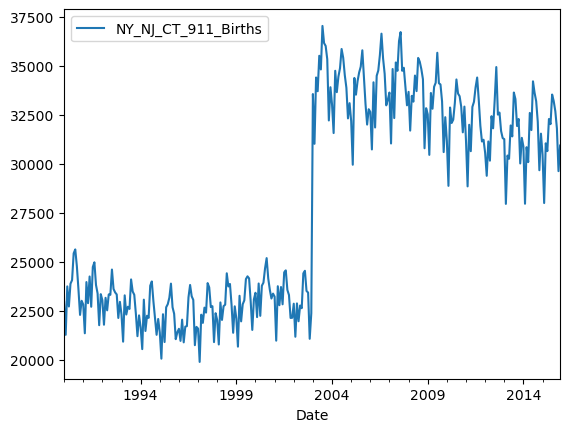

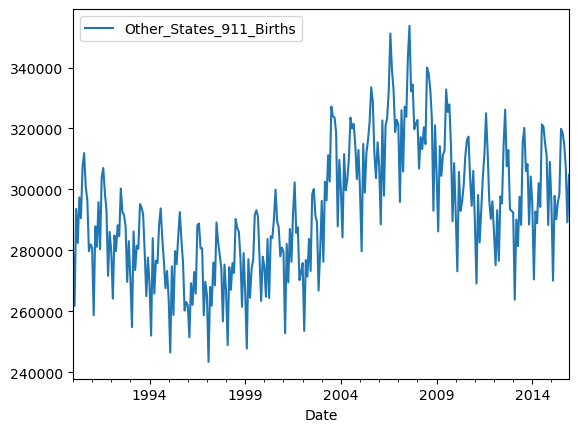

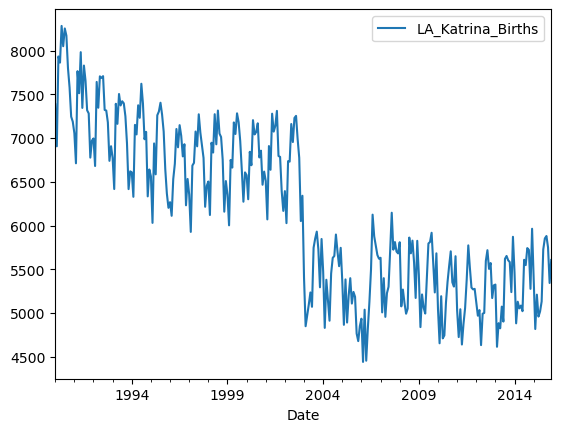

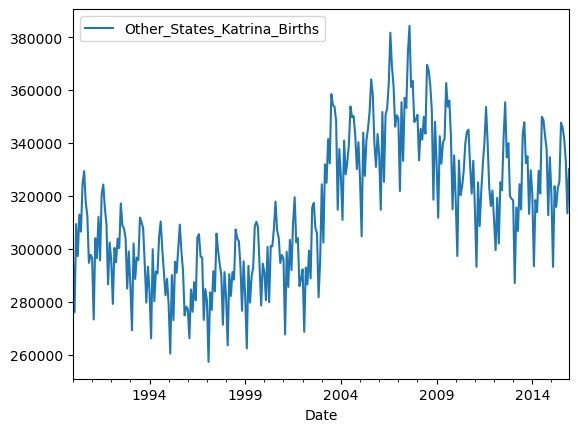

In [90]:
# plot the data
tri_state_911_df.plot()
other_states_911_df.plot()
la_katrina_df.plot()
other_states_katrina_df.plot()


In [91]:
# reset the index for the dataframes to use with prophet
tri_state_911_df.reset_index(inplace=True)
other_states_911_df.reset_index(inplace=True)
la_katrina_df.reset_index(inplace=True)
other_states_katrina_df.reset_index(inplace=True)

# rename the columns
tri_state_911_df.columns = ['ds', 'y']
other_states_911_df.columns = ['ds', 'y']
la_katrina_df.columns = ['ds', 'y']
other_states_katrina_df.columns = ['ds', 'y']



In [92]:
# 911 DATA
# 

In [93]:
# slice the data to use only the data from September 1991 to September 2001 for 911 data
tri_state_911_91_01_df = tri_state_911_df[(tri_state_911_df['ds'] >= '1991-09-01') & (tri_state_911_df['ds'] <= '2001-08-01')]
other_states_911_91_01_df = other_states_911_df[(other_states_911_df['ds'] >= '1991-09-01') & (other_states_911_df['ds'] <= '2001-08-01')]

# slice the data to use only the data from September 2001 to September 2011 for 911 data
tri_state_911_01_11_df = tri_state_911_df[(tri_state_911_df['ds'] >= '2001-09-01') & (tri_state_911_df['ds'] <= '2011-08-01')]
other_states_911_01_11_df = other_states_911_df[(other_states_911_df['ds'] >= '2001-09-01') & (other_states_911_df['ds'] <= '2011-08-01')]

# display the data
display(tri_state_911_91_01_df.head())
display(other_states_911_91_01_df.head())
display(tri_state_911_01_11_df.head())
display(other_states_911_01_11_df.head())


,ds,y
20,1991-09-01,23811
21,1991-10-01,23381
22,1991-11-01,21759
23,1991-12-01,23342
24,1992-01-01,23036


,ds,y
20,1991-09-01,298871
21,1991-10-01,293203
22,1991-11-01,271648
23,1991-12-01,286049
24,1992-01-01,279674


,ds,y
140,2001-09-01,23558
141,2001-10-01,23299
142,2001-11-01,22128
143,2001-12-01,22137
144,2002-01-01,22856


,ds,y
140,2001-09-01,285736
141,2001-10-01,287545
142,2001-11-01,270231
143,2001-12-01,272629
144,2002-01-01,275815


<Axes: title={'center': '911 Births in Other States between 2001 and 2011'}, xlabel='ds'>

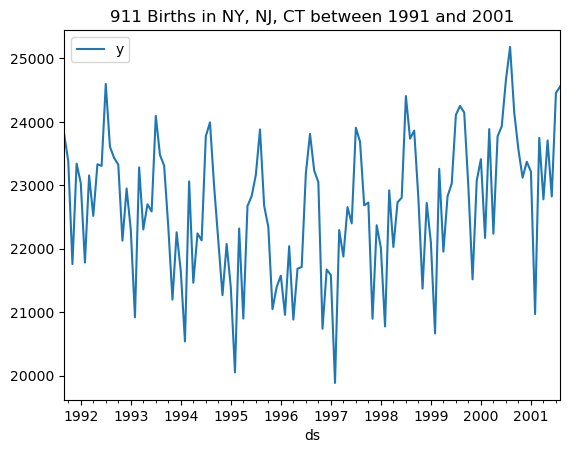

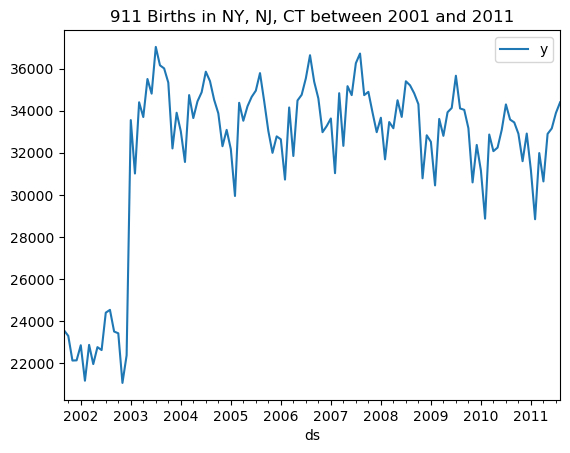

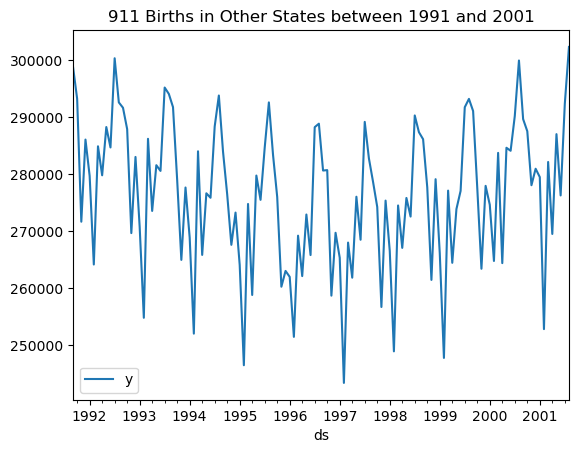

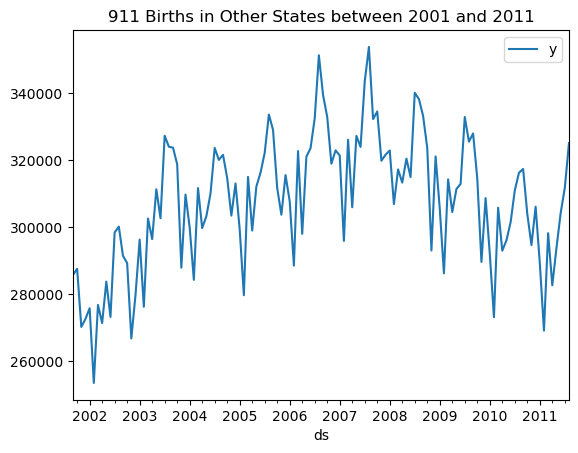

In [94]:
# plot the data
tri_state_911_91_01_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 1991 and 2001')
tri_state_911_01_11_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 2001 and 2011')

other_states_911_91_01_df.plot(x='ds', y='y', title='911 Births in Other States between 1991 and 2001')
other_states_911_01_11_df.plot(x='ds', y='y', title='911 Births in Other States between 2001 and 2011')

In [95]:
# create a prophet model
m911 = Prophet()
m911_other = Prophet()


In [96]:
# fit the model
m911.fit(tri_state_911_91_01_df)
m911_other.fit(other_states_911_91_01_df)


12:26:30 - cmdstanpy - INFO - Chain [1] start processing
12:26:30 - cmdstanpy - INFO - Chain [1] done processing
12:26:30 - cmdstanpy - INFO - Chain [1] start processing
12:26:30 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
# create a future dataframe for 911 data and predict the values for the next 10 years
future911 = m911.make_future_dataframe(periods=120, freq='M')
future911_other = m911_other.make_future_dataframe(periods=120, freq='M')
forecast911 = m911.predict(future911)
forecast911_other = m911_other.predict(future911_other)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [98]:
# display the forecast
display(forecast911.tail())
display(forecast911_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
235,2011-03-31,26771.590227,23564.265982,26412.384048,25432.098642,28140.782699,-1795.112590,-1795.112590,-1795.112590,-1795.112590,-1795.112590,-1795.112590,0.0,0.0,0.0,24976.477636
236,2011-04-30,26797.185960,25132.112208,28097.234139,25437.799474,28178.899660,-209.164774,-209.164774,-209.164774,-209.164774,-209.164774,-209.164774,0.0,0.0,0.0,26588.021186
237,2011-05-31,26823.634885,25692.135184,28584.332023,25447.215372,28228.928506,319.771976,319.771976,319.771976,319.771976,319.771976,319.771976,0.0,0.0,0.0,27143.406860
238,2011-06-30,26849.230618,26567.913846,29574.457927,25456.229421,28272.884060,1207.971312,1207.971312,1207.971312,1207.971312,1207.971312,1207.971312,0.0,0.0,0.0,28057.201931
239,2011-07-31,26875.679543,27272.690932,30225.630049,25465.844019,28317.124474,1843.854393,1843.854393,1843.854393,1843.854393,1843.854393,1843.854393,0.0,0.0,0.0,28719.533936


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
235,2011-03-31,313856.193696,280015.797350,308943.816294,299576.898872,327325.688191,-18954.009071,-18954.009071,-18954.009071,-18954.009071,-18954.009071,-18954.009071,0.0,0.0,0.0,294902.184624
236,2011-04-30,314106.710584,294950.915112,324459.322022,299603.120609,327863.979191,-3765.765890,-3765.765890,-3765.765890,-3765.765890,-3765.765890,-3765.765890,0.0,0.0,0.0,310340.944694
237,2011-05-31,314365.578035,300621.962049,329524.797722,299608.071140,328251.433107,1302.992540,1302.992540,1302.992540,1302.992540,1302.992540,1302.992540,0.0,0.0,0.0,315668.570574
238,2011-06-30,314616.094923,310881.630583,341333.695393,299618.191312,328658.660781,11981.518440,11981.518440,11981.518440,11981.518440,11981.518440,11981.518440,0.0,0.0,0.0,326597.613362
239,2011-07-31,314874.962373,320330.309319,350357.135798,299732.670392,329143.915643,20935.982791,20935.982791,20935.982791,20935.982791,20935.982791,20935.982791,0.0,0.0,0.0,335810.945164


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 0.98, '911 Births forecast in Other States between 2001 and 2012')

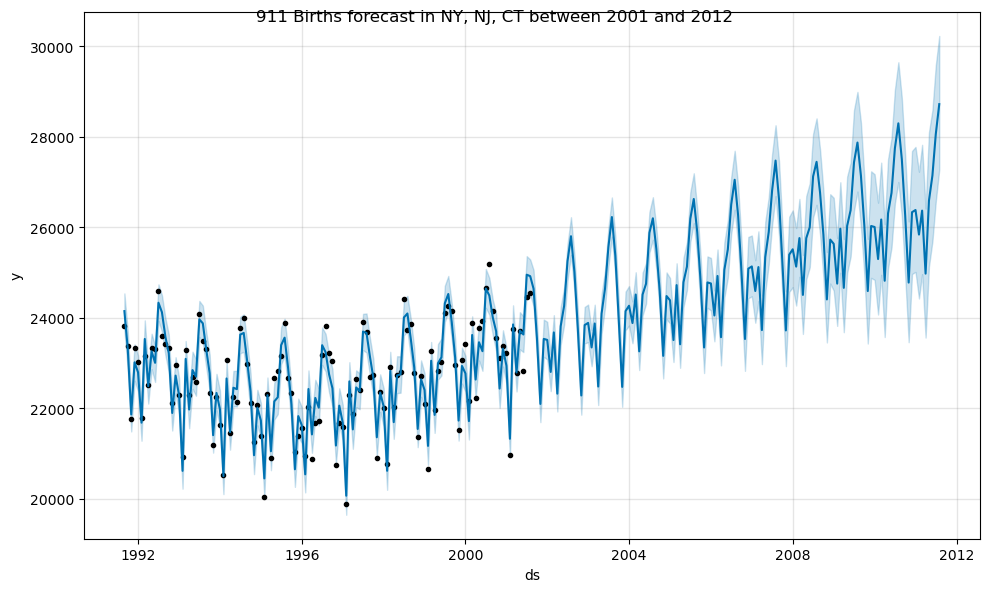

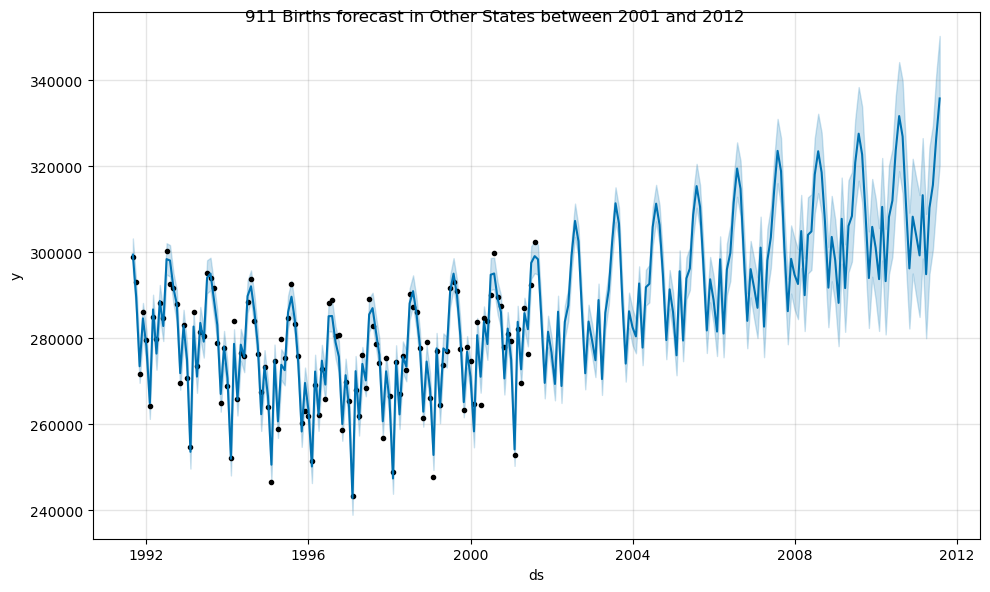

In [99]:
# plot the prediction
fig911 = m911.plot(forecast911)
fig911.suptitle('911 Births forecast in NY, NJ, CT between 2001 and 2012', fontsize=12)
fig911_other = m911_other.plot(forecast911_other)
fig911_other.suptitle('911 Births forecast in Other States between 2001 and 2012', fontsize=12)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for NY, NJ and CT states')

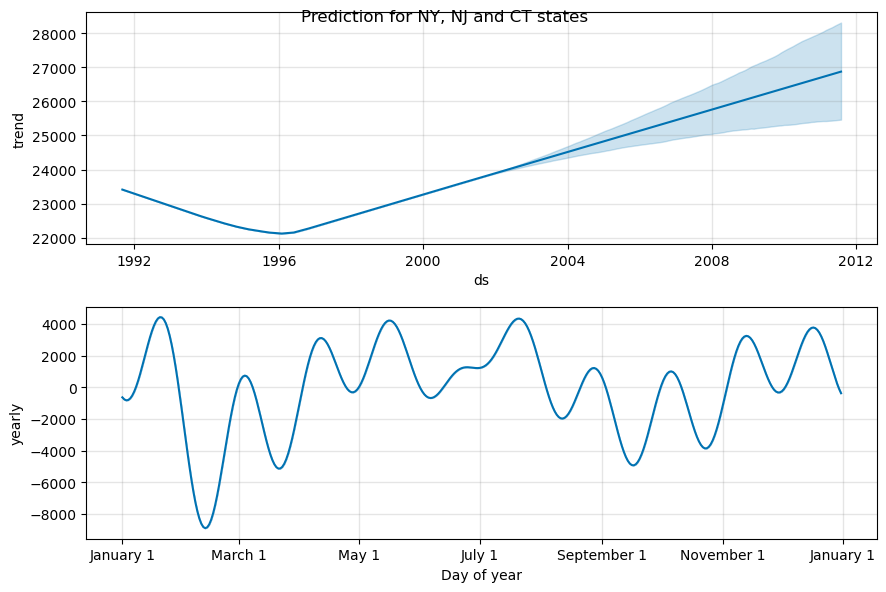

In [100]:
# plot the components
fig911_comp = m911.plot_components(forecast911)
fig911_comp.suptitle('Prediction for NY, NJ and CT states', fontsize=12)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for States other than NY, NJ and CT')

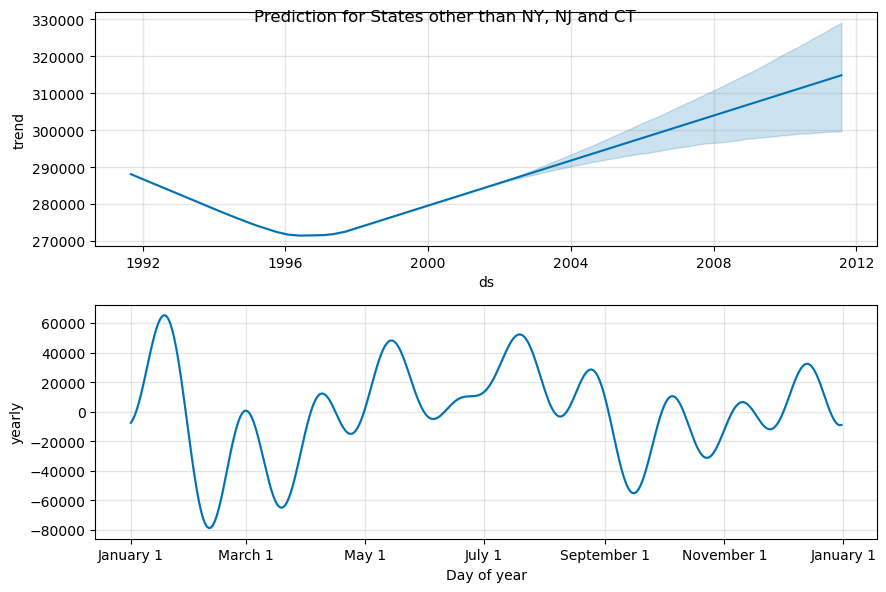

In [101]:
# plot the components and add title "Prediction from 2001 to 2011 for States other than NY, NJ and CT" to the plots

fig911_other_comp = m911_other.plot_components(forecast911_other)
fig911_other_comp.suptitle('Prediction for States other than NY, NJ and CT', fontsize=12)

In [102]:
# KATRINA DATA

In [103]:
# select data only from August 1995 to August 2005 for Katrina data
la_katrina_95_05_df = la_katrina_df[(la_katrina_df['ds'] >= '1995-08-01') & (la_katrina_df['ds'] <= '2005-08-01')]
other_states_katrina_95_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '1995-08-01') & (other_states_katrina_df['ds'] <= '2005-08-01')]

# select data only from August 2005 to August 2015 for Katrina data
la_katrina_05_15_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2015-08-01')]
other_states_katrina_05_15_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2015-08-01')]

# display the data
display(la_katrina_95_05_df.head())
display(other_states_katrina_95_05_df.head())
display(la_katrina_05_15_df.head())
display(other_states_katrina_05_15_df.head())


,ds,y
67,1995-08-01,7269
68,1995-09-01,7075
69,1995-10-01,6645
70,1995-11-01,6367
71,1995-12-01,6203


,ds,y
67,1995-08-01,309180
68,1995-09-01,298957
69,1995-10-01,291680
70,1995-11-01,274933
71,1995-12-01,278214


,ds,y
187,2005-08-01,5242
188,2005-09-01,5186
189,2005-10-01,4766
190,2005-11-01,4680
191,2005-12-01,4851


,ds,y
187,2005-08-01,364074
188,2005-09-01,358183
189,2005-10-01,339873
190,2005-11-01,330987
191,2005-12-01,343403


<Axes: title={'center': 'Births in Other States between 2005 and 2015 (after Katrina)'}, xlabel='ds'>

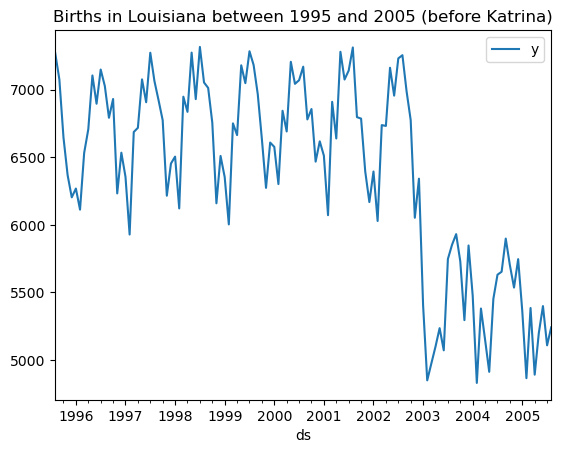

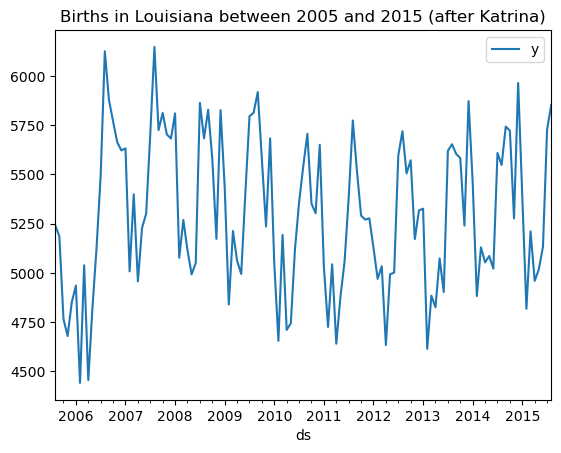

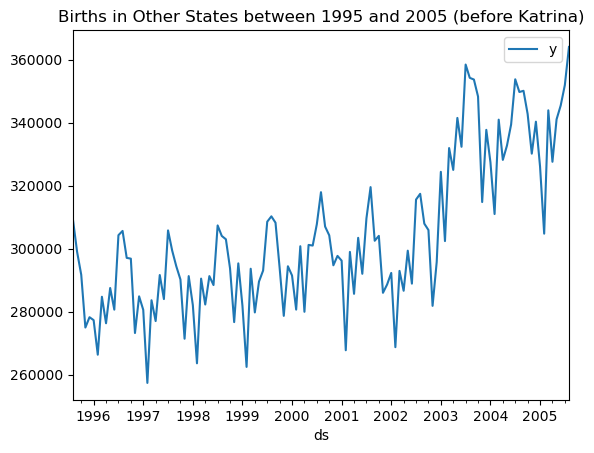

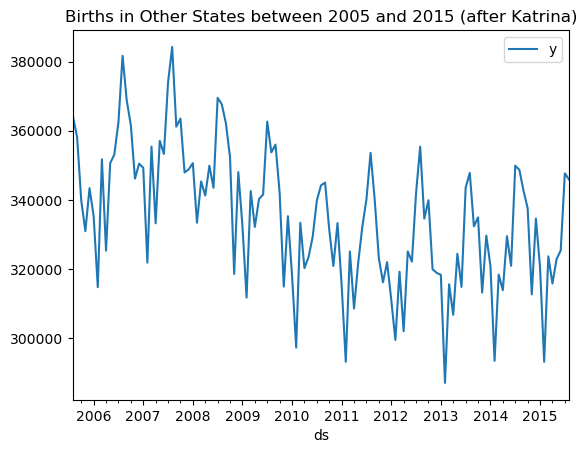

In [104]:
# plot the data
la_katrina_95_05_df.plot(x='ds', y='y', title='Births in Louisiana between 1995 and 2005 (before Katrina)')
la_katrina_05_15_df.plot(x='ds', y='y', title='Births in Louisiana between 2005 and 2015 (after Katrina)')
other_states_katrina_95_05_df.plot(x='ds', y='y', title='Births in Other States between 1995 and 2005 (before Katrina)')
other_states_katrina_05_15_df.plot(x='ds', y='y', title='Births in Other States between 2005 and 2015 (after Katrina)')

In [105]:
# create a prophet model
m_katrina = Prophet()
m_katrina_other = Prophet()

# fit the model
m_katrina.fit(la_katrina_95_05_df)
m_katrina_other.fit(other_states_katrina_95_05_df)

12:26:32 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing
12:26:32 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
# create a future dataframe for Katrina data and predict the values for the next 10 years
future_katrina = m_katrina.make_future_dataframe(periods=120, freq='M')
future_katrina_other = m_katrina_other.make_future_dataframe(periods=120, freq='M')
forecast_katrina = m_katrina.predict(future_katrina)
forecast_katrina_other = m_katrina_other.predict(future_katrina_other)


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [107]:
# display the forecast
display(forecast_katrina.tail())
display(forecast_katrina_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
236,2015-03-31,678.259999,-492.498173,1510.913141,-258.278551,1568.380614,-173.185127,-173.185127,-173.185127,-173.185127,-173.185127,-173.185127,0.0,0.0,0.0,505.074871
237,2015-04-30,641.815439,-97.485506,1904.415731,-304.542082,1545.613708,256.611947,256.611947,256.611947,256.611947,256.611947,256.611947,0.0,0.0,0.0,898.427386
238,2015-05-31,604.156060,-633.347395,1443.222468,-353.457310,1519.931067,-165.589915,-165.589915,-165.589915,-165.589915,-165.589915,-165.589915,0.0,0.0,0.0,438.566146
239,2015-06-30,567.711500,59.247026,2099.807220,-401.165062,1493.185206,523.624744,523.624744,523.624744,523.624744,523.624744,523.624744,0.0,0.0,0.0,1091.336244
240,2015-07-31,530.052122,-40.182542,2077.775708,-454.144258,1470.078162,520.839282,520.839282,520.839282,520.839282,520.839282,520.839282,0.0,0.0,0.0,1050.891404


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
236,2015-03-31,377349.559734,253450.106522,494539.333536,263342.440884,505706.412309,-11288.323351,-11288.323351,-11288.323351,-11288.323351,-11288.323351,-11288.323351,0.0,0.0,0.0,366061.236383
237,2015-04-30,377645.218747,259192.404423,505446.970672,262277.696247,507447.335926,-1511.506391,-1511.506391,-1511.506391,-1511.506391,-1511.506391,-1511.506391,0.0,0.0,0.0,376133.712356
238,2015-05-31,377950.733060,245846.378505,497731.454509,260909.363874,509105.951724,-11706.987433,-11706.987433,-11706.987433,-11706.987433,-11706.987433,-11706.987433,0.0,0.0,0.0,366243.745628
239,2015-06-30,378246.392073,279459.656745,529782.474335,260760.546617,510791.826493,20541.212157,20541.212157,20541.212157,20541.212157,20541.212157,20541.212157,0.0,0.0,0.0,398787.604230
240,2015-07-31,378551.906387,278160.362465,532323.688621,259509.295059,512318.981282,19805.851807,19805.851807,19805.851807,19805.851807,19805.851807,19805.851807,0.0,0.0,0.0,398357.758193


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 0.98, 'Births forecast in Other States between 2005 and 2015')

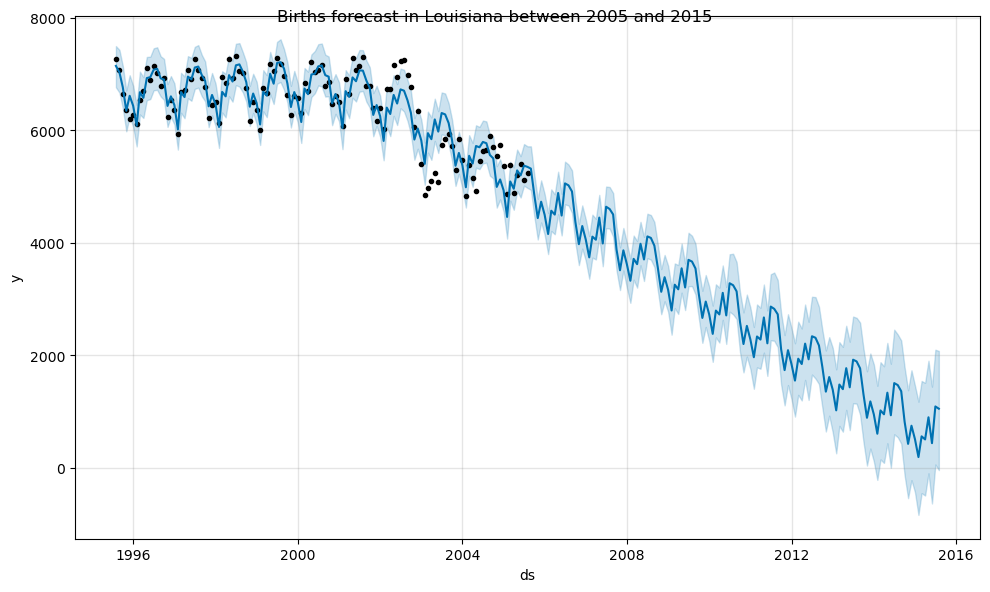

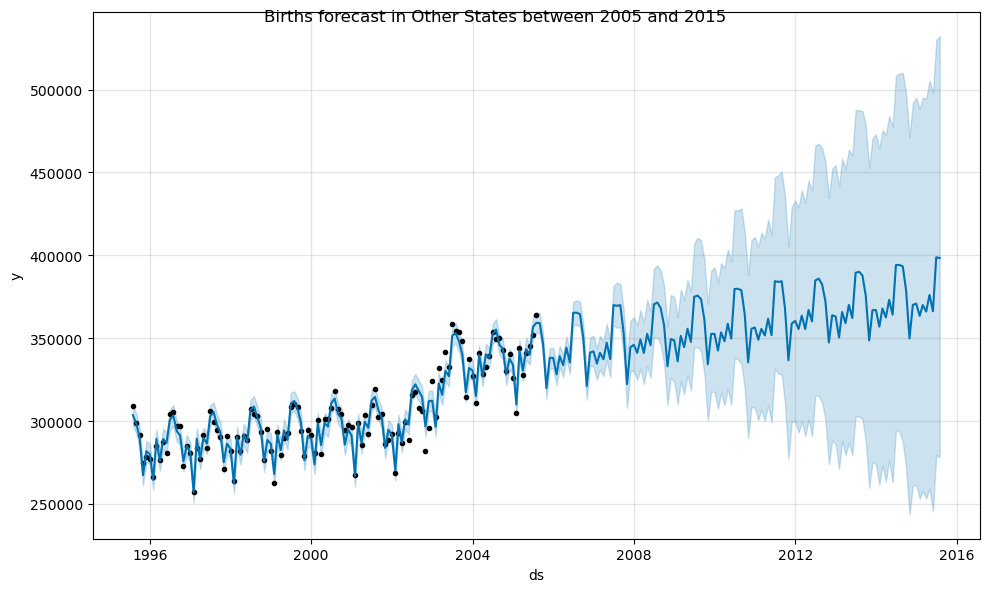

In [108]:
# plot the prediction
fig_katrina = m_katrina.plot(forecast_katrina)
fig_katrina.suptitle('Births forecast in Louisiana between 2005 and 2015', fontsize=12)
fig_katrina_other = m_katrina_other.plot(forecast_katrina_other)
fig_katrina_other.suptitle('Births forecast in Other States between 2005 and 2015', fontsize=12)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for Other States (post Katrina)')

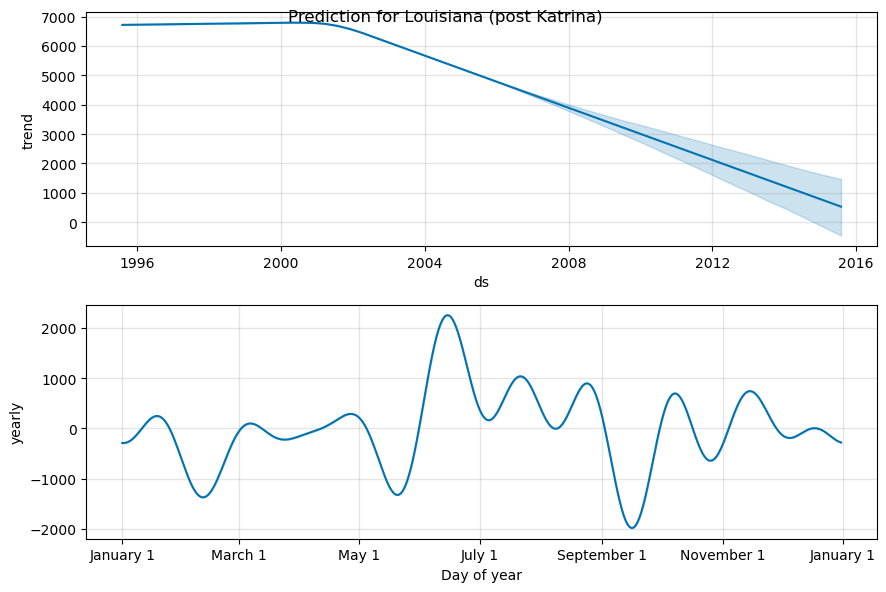

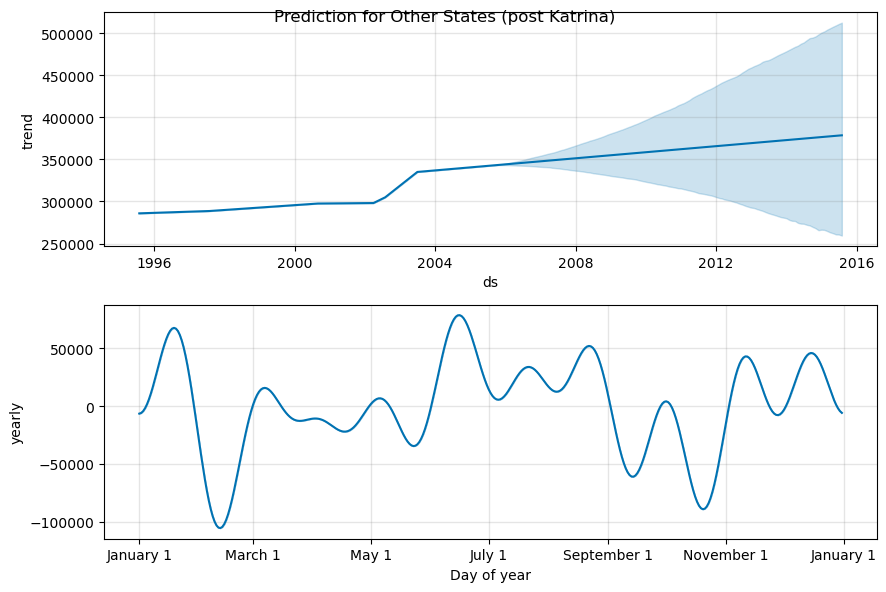

In [109]:
# plot the components
fig_katrina_comp = m_katrina.plot_components(forecast_katrina)
fig_katrina_comp.suptitle('Prediction for Louisiana (post Katrina)', fontsize=12)
fig_katrina_other_comp = m_katrina_other.plot_components(forecast_katrina_other)
fig_katrina_other_comp.suptitle('Prediction for Other States (post Katrina)', fontsize=12)